## Notebook Imports

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/ 

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:13<00:00, 52.8MB/s]
100% 812M/812M [00:13<00:00, 65.4MB/s]


In [ ]:
!mkdir dogs-vs-cats

In [ ]:
!unzip dogs-vs-cats.zip -d dogs-vs-cats

Archive:  dogs-vs-cats.zip
  inflating: dogs-vs-cats/sampleSubmission.csv  
  inflating: dogs-vs-cats/test1.zip  
  inflating: dogs-vs-cats/train.zip  


In [ ]:
!mkdir dogs-vs-cats/train
!mkdir dogs-vs-cats/test

In [ ]:
!unzip dogs-vs-cats/test1.zip -d dogs-vs-cats/test
!unzip dogs-vs-cats/train.zip -d dogs-vs-cats/train

Streaming output truncated to the last 5000 lines.
  inflating: dogs-vs-cats/train/train/dog.5499.jpg  
  inflating: dogs-vs-cats/train/train/dog.55.jpg  
  inflating: dogs-vs-cats/train/train/dog.550.jpg  
  inflating: dogs-vs-cats/train/train/dog.5500.jpg  
  inflating: dogs-vs-cats/train/train/dog.5501.jpg  
  inflating: dogs-vs-cats/train/train/dog.5502.jpg  
  inflating: dogs-vs-cats/train/train/dog.5503.jpg  
  inflating: dogs-vs-cats/train/train/dog.5504.jpg  
  inflating: dogs-vs-cats/train/train/dog.5505.jpg  
  inflating: dogs-vs-cats/train/train/dog.5506.jpg  
  inflating: dogs-vs-cats/train/train/dog.5507.jpg  
  inflating: dogs-vs-cats/train/train/dog.5508.jpg  
  inflating: dogs-vs-cats/train/train/dog.5509.jpg  
  inflating: dogs-vs-cats/train/train/dog.551.jpg  
  inflating: dogs-vs-cats/train/train/dog.5510.jpg  
  inflating: dogs-vs-cats/train/train/dog.5511.jpg  
  inflating: dogs-vs-cats/train/train/dog.5512.jpg  
  inflating: dogs-vs-cats/train/train/dog.5513.jpg  

In [ ]:
!mkdir dogs-cats-imgs

In [ ]:
!mkdir dogs-cats-imgs/train

In [ ]:
!mkdir dogs-cats-imgs/test

In [ ]:
import os, shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.layers import Dense, Dropout, Activation, Conv2D, Flatten
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Directories for Datasets

In [ ]:
# location of original data
original_train_data = "/content/dogs-vs-cats/train/train"
original_test_data = "/content/dogs-vs-cats/test/test1"


# directory to save new data
base_directory = "/content/dogs-cats-imgs"
try:
  os.mkdir(base_directory)
except FileExistsError as e:
  print(f"{e}: Base Directory Exists")

[Errno 17] File exists: '/content/dogs-cats-imgs': Base Directory Exists


In [ ]:
train_dir = os.path.join(base_directory, "train")

test_dir = os.path.join(base_directory, "test")

val_dir = os.path.join(base_directory, "validation")

  # os.mkdir(train_dir)
  # os.mkdir(test_dir)
os.mkdir(val_dir)
# except FileExistsError as e:
#   print('Files Exists')



**Creating Training, Testing and Validation Sets for cats**

In [ ]:
train_cats_dir = os.path.join(train_dir, "cats")
# test_cats_dir = os.path.join(test_dir, "cats")
val_cats_dir = os.path.join(val_dir, "cats")

**Creating Training, Testing and Validation Sets for dogs**

In [ ]:
train_dogs_dir = os.path.join(train_dir, "dogs")
# test_dogs_dir = os.path.join(test_dir, "dogs")
val_dogs_dir = os.path.join(val_dir, "dogs")

try:
  os.mkdir(train_cats_dir)
  os.mkdir(val_cats_dir)
  os.mkdir(train_dogs_dir)
  os.mkdir(val_dogs_dir)
except Exception as e:
  print(e)

In [ ]:
file_names = [f"cat.{i}.jpg" for i in range(7000)]
for file_name in file_names:
  src = os.path.join(original_train_data, file_name)
  dest = os.path.join(train_cats_dir, file_name)
  shutil.copy(src, dest)

# validation set for cats
file_names = [f"cat.{i}.jpg" for i in range(7001, 12500)]
for file_name in file_names:
  src = os.path.join(original_train_data, file_name)
  dest = os.path.join(val_cats_dir, file_name)
  shutil.copy(src, dest)

In [ ]:
file_names = [f"dog.{i}.jpg" for i in range(7000)]
for file_name in file_names:
  src = os.path.join(original_train_data, file_name)
  dest = os.path.join(train_dogs_dir, file_name)
  shutil.copy(src, dest)

# validation set for dogs
file_names = [f"dog.{i}.jpg" for i in range(7000, 12500)]
for file_name in file_names:
  src = os.path.join(original_train_data, file_name)
  dest = os.path.join(val_dogs_dir, file_name)
  shutil.copy(src, dest)

In [ ]:
# test set for cats
# file_names = [f"cat.{i}.jpg" for i in range(6250)]
for file_name in os.listdir(original_test_data):
  src = os.path.join(original_test_data, file_name)
  dest = os.path.join(test_dir, file_name)
  shutil.copy(src, dest)

## Model

**Model Instantiation**

In [ ]:
model = Sequential([
  Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
  MaxPooling2D((2, 2)),
  Conv2D(64, (3, 3), activation='relu'),
  MaxPooling2D((2, 2)),
  Conv2D(128, (3, 3), activation="relu"),
  MaxPooling2D((2, 2)),
  Conv2D(128, (3, 3), activation="relu"),
  MaxPooling2D((2, 2)),
  Flatten(),
  Dense(256, activation="relu"),
  Dense(1, activation="sigmoid")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
model.compile(
  loss="binary_crossentropy",
  optimizer="RMSProp",
  metrics=["accuracy"]
)

## Data Preprocessing

#### **1. Reading the Picture Files**

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(150, 150),
  batch_size=20,
  class_mode="binary"
)

validation_generator = test_datagen.flow_from_directory(
  val_dir,
  target_size=(150,150),
  batch_size=20,
  class_mode="binary"
)

Found 14000 images belonging to 2 classes.
Found 10999 images belonging to 2 classes.


In [ ]:
for data_batch, label_batch in train_generator:
  print(f"data batch shape:", data_batch.shape)
  print(f"label batch shape:", label_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
label batch shape: (20,)


In [ ]:
history = model.fit(
  train_generator,
  steps_per_epoch=150,
  epochs=20,
  validation_data=validation_generator,
  validation_steps=110
)

Epoch 1/20
150/150 [==============================] - 31s 119ms/step - loss: 0.7539 - accuracy: 0.5157 - val_loss: 0.7013 - val_accuracy: 0.4973
Epoch 2/20
150/150 [==============================] - 23s 154ms/step - loss: 0.6829 - accuracy: 0.5697 - val_loss: 0.6484 - val_accuracy: 0.6405
Epoch 3/20
150/150 [==============================] - 25s 168ms/step - loss: 0.6609 - accuracy: 0.6350 - val_loss: 0.6322 - val_accuracy: 0.6314
Epoch 4/20
150/150 [==============================] - 24s 158ms/step - loss: 0.6282 - accuracy: 0.6547 - val_loss: 0.5998 - val_accuracy: 0.6591
Epoch 5/20
150/150 [==============================] - 22s 146ms/step - loss: 0.6016 - accuracy: 0.6743 - val_loss: 0.5754 - val_accuracy: 0.7009
Epoch 6/20
150/150 [==============================] - 19s 125ms/step - loss: 0.5855 - accuracy: 0.7017 - val_loss: 0.6162 - val_accuracy: 0.6664
Epoch 7/20
150/150 [==============================] - 22s 147ms/step - loss: 0.5640 - accuracy: 0.7053 - val_loss: 0.5963 - val_ac

In [ ]:
model.save("cats_and_dogs.h5")

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

In [ ]:
epochs = range(1, len(acc) + 1)

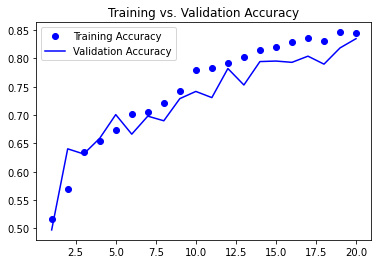

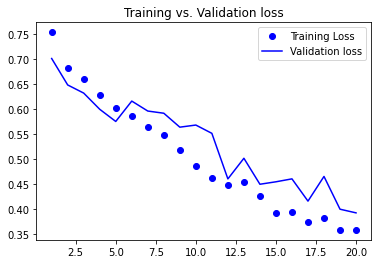

In [ ]:
plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b-", label="Validation Accuracy")
plt.title("Training vs. Validation Accuracy")
plt.legend()

plt.figure()
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b-", label="Validation loss")
plt.title("Training vs. Validation loss")
plt.legend()

## Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=50,
    width_shift_range = 0.3,
    height_shift_range = 0.3,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest"
)

In [ ]:
# filepath for images
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

In [ ]:
img_path = fnames[3]

In [ ]:
img = image.load_img(
    img_path, target_size=(150, 150)
)

In [ ]:
x = image.img_to_array(img)

In [ ]:
x = x.reshape((1,) + x.shape )

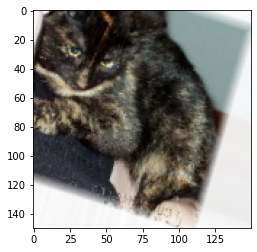

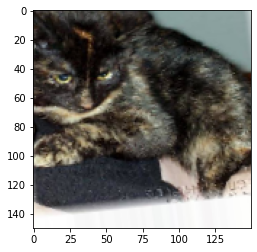

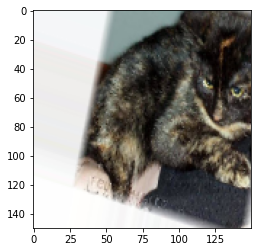

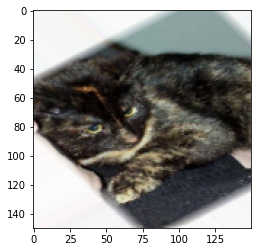

In [ ]:
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break

## Model with regularisation using dropout

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation="relu"),
    Dense(1, activation="sigmoid")
])
model.compile(
    loss="binary_crossentropy",
    optimizer="RMSProp",
    metrics=["accuracy"]
)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode="binary"
)

Found 14000 images belonging to 2 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode="binary"
)

Found 10999 images belonging to 2 classes.


In [44]:
history = model.fit(
    train_generator,
    # steps_per_epochs=100,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/50
219/219 [==============================] - 104s 468ms/step - loss: 0.7359 - accuracy: 0.5388 - val_loss: 0.6527 - val_accuracy: 0.5759
Epoch 2/50
219/219 [==============================] - 102s 465ms/step - loss: 0.6582 - accuracy: 0.6144 - val_loss: 0.6077 - val_accuracy: 0.6737
Epoch 3/50
219/219 [==============================] - 102s 464ms/step - loss: 0.6354 - accuracy: 0.6482 - val_loss: 0.6164 - val_accuracy: 0.6456
Epoch 4/50
219/219 [==============================] - 101s 463ms/step - loss: 0.6023 - accuracy: 0.6740 - val_loss: 0.5328 - val_accuracy: 0.7325
Epoch 5/50
219/219 [==============================] - 102s 464ms/step - loss: 0.5862 - accuracy: 0.6915 - val_loss: 0.5028 - val_accuracy: 0.7697
Epoch 6/50
219/219 [==============================] - 101s 463ms/step - loss: 0.5703 - accuracy: 0.7026 - val_loss: 0.4899 - val_accuracy: 0.7747
Epoch 7/50
219/219 [==============================] - 101s 463ms/step - loss: 0.5579 - accuracy: 0.7124 - val_loss: 0.4528 -

In [ ]:
model.save('cats_and_dogs_2.h5')

In [49]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

In [50]:
epochs = range(1, len(acc) + 1)

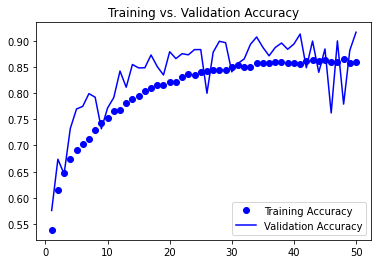

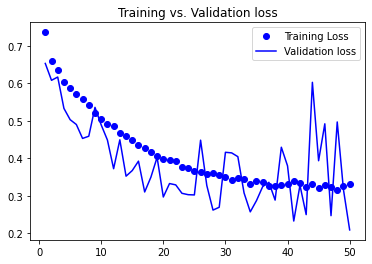

In [51]:
plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b-", label="Validation Accuracy")
plt.title("Training vs. Validation Accuracy")
plt.legend()

plt.figure()
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b-", label="Validation loss")
plt.title("Training vs. Validation loss")
plt.legend()